# See "Problems" section below. The "cleaned" data set needs further cleaning.

This notebook examines the basic stats and shape of the data.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import re

from functools import partial

Import the cleaned data:

In [2]:
%ls ../../data/genre_lists/data_ready_for_model/

dan_sample_to_verify_2020-05-01-09-16.csv
genre_list_2020-05-04-09-39.csv
tom_sample_to_verify_2020-05-01-09-16.csv
wiki-kaggle_X_test_2020-05-04-09-42.csv
wiki-kaggle_X_train_2020-05-04-09-42.csv
wiki-kaggle_genres_gender_cleaned_2020-05-01-09-16.csv
wiki-kaggle_genres_gender_cleaned_2020-05-04-09-39.csv
wiki-kaggle_y_test_2020-05-04-09-42.csv
wiki-kaggle_y_train_2020-05-04-09-42.csv


In [6]:
now = '2020-05-04-09-42'

In [7]:
X_train = pd.read_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_train_{}.csv'.format(now), index_col = ['artist'])
y_train = pd.read_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_train_{}.csv'.format(now), index_col = ['artist'])

In [8]:
X_train.head()

,genrelist,genrelist_length
artist,,
Claudia_Church,['country'],1
Peter_Yarrow,['folk'],1
Lorraine_Bowen,"['comedy', 'independent_music']",2
Mike_Pender,"['rock', 'pop']",2
Jennifer_Paige,"['pop', 'pop_rock']",2


In [9]:
X_train.shape, y_train.shape

((12376, 2), (12376, 1))

In [10]:
data = y_train.join( [X_train], how = 'outer')

In [11]:
data.head()

,gender,genrelist,genrelist_length
artist,,,
Claudia_Church,female,['country'],1
Peter_Yarrow,male,['folk'],1
Lorraine_Bowen,female,"['comedy', 'independent_music']",2
Mike_Pender,male,"['rock', 'pop']",2
Jennifer_Paige,female,"['pop', 'pop_rock']",2


In [12]:
data.shape, data.isnull().sum()

((12376, 3),
 gender              0
 genrelist           0
 genrelist_length    0
 dtype: int64)

### Genre Labels

Each value of the genre column is a _string_ of comma separated genre labels. We want to convert it to a _list_ of strings.

In [13]:
"""This function takes in a string of the form
appearing in the genrelist of the dataframe.
It strips the square brackets and extra quotes and
returns a list of strings where each string is a genre label."""
def genrelist(string):
    string = string.strip("[").strip("]").replace("'","")
    L = [s for s in string.split(',')]
    L_new = []
    for x in L:
        L_new.append(x.replace(" ","_").lstrip("_").rstrip("_"))
    while (str("") in L_new):
        L_new.remove("")
    return L_new

Now we apply it to the whole column and put the lists in a new column:

In [14]:
data['genrelist']= data['genrelist'].apply(genrelist)

In [15]:
data.head()

,gender,genrelist,genrelist_length
artist,,,
Claudia_Church,female,[country],1
Peter_Yarrow,male,[folk],1
Lorraine_Bowen,female,"[comedy, independent_music]",2
Mike_Pender,male,"[rock, pop]",2
Jennifer_Paige,female,"[pop, pop_rock]",2


### Extract unique genre labels: 

### This is for the training set; consider importing the labels from the whole data set

In [16]:
genre_list = data.genrelist.values.tolist()
genre_list = [x for y in genre_list for x in y]
genre_list = list(set(genre_list))

In [17]:
genre_list[:5]

['art_song',
 'extreme_metal',
 'independent_music',
 'songwriter',
 'new_orleans_blues']

In [18]:
len(genre_list)

1669

In [19]:
print('There are {} artists with genre and binary-gender labels.'.format(data.shape[0]))
print('There are {} unique genre labels.'.format(len(genre_list)))

There are 12376 artists with genre and binary-gender labels.
There are 1669 unique genre labels.


### Export the list of genres:

In [20]:
genre_list_df = pd.DataFrame({'genre_list':genre_list})

In [21]:
genre_list_df.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/genre_list_training_{}.csv'.format(now))

In [22]:
%ls ../../data/genre_lists/data_ready_for_model/

dan_sample_to_verify_2020-05-01-09-16.csv
genre_list_2020-05-04-09-39.csv
genre_list_training_2020-05-04-09-42.csv
tom_sample_to_verify_2020-05-01-09-16.csv
wiki-kaggle_X_test_2020-05-04-09-42.csv
wiki-kaggle_X_train_2020-05-04-09-42.csv
wiki-kaggle_genres_gender_cleaned_2020-05-01-09-16.csv
wiki-kaggle_genres_gender_cleaned_2020-05-04-09-39.csv
wiki-kaggle_y_test_2020-05-04-09-42.csv
wiki-kaggle_y_train_2020-05-04-09-42.csv


In [23]:
data_male = data[data.gender == 'male']
data_female = data[data.gender == 'female']

In [24]:
tot = data.shape[0]
m = data_male.shape[0]
f = data_female.shape[0]
print('{} total artists'.format(tot))
print('{} female artists, or {:0.0f}%'.format(f, 100*f/(f+m)))
print('{} male artists, or {:0.0f}%'.format(m, 100*m/(f+m)))

12376 total artists
3866 female artists, or 31%
8510 male artists, or 69%


### Count the min, mean, max of number of genres:

In [25]:
n = data.shape[0]
a,b,c = data.genrelist_length.mean(), data.genrelist_length.std(), data.genrelist_length.max()
print('Total:')
print(f'{n} Artists.')
print(f'Mean number of genre labels: {round(a,2)}.')
print(f'STD of the number of genre labels: {round(b,2)}.')
print(f'Max number of genre labels: {c}.')

Total:
12376 Artists.
Mean number of genre labels: 2.7.
STD of the number of genre labels: 1.84.
Max number of genre labels: 73.


### Count the min, mean, max of number of genres for male and female artists:

In [26]:
data_female = data[data.gender == 'female']
n = data_female.shape[0]
a,b,c = data_female.genrelist_length.mean(), data_female.genrelist_length.std(), data_female.genrelist_length.max()
print('Female:')
print(f'{n} Artists.')
print(f'Mean number of genre labels: {round(a,2)}.')
print(f'STD of the number of genre labels: {round(b,2)}.')
print(f'Max number of genre labels: {c}.')

Female:
3866 Artists.
Mean number of genre labels: 2.63.
STD of the number of genre labels: 1.53.
Max number of genre labels: 11.


In [27]:
# plt.hist(data_female.num_genres, bins = 25, density = True)
# plt.show()

In [28]:
data_male = data[data.gender == 'male']
m = data_male.shape[0]
a,b,c = data_male.genrelist_length.mean(), data_male.genrelist_length.std(), data_male.genrelist_length.max()
print('Male:')
print(f'{m} Artists.')
print(f'Mean number of genre labels: {round(a,2)}.')
print(f'STD of the number of genre labels: {round(b,2)}.')
print(f'Max number of genre labels: {c}.')

Male:
8510 Artists.
Mean number of genre labels: 2.73.
STD of the number of genre labels: 1.96.
Max number of genre labels: 73.


In [29]:
# plt.hist(data_male.num_genres, bins = 25, density = True)
# plt.show()

Set variables:

In [30]:
max_num_male = 73
max_num_female = 11
max_num = max(max_num_female, max_num_male)

### The histograms for genre labels for male and female artists. 

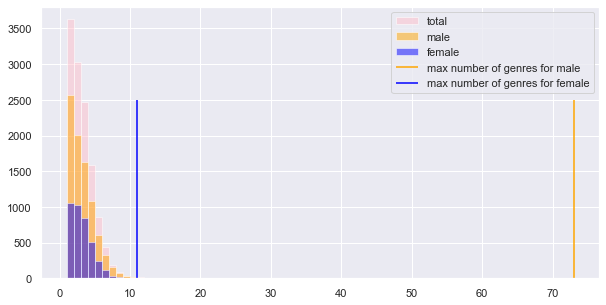

In [31]:
plt.figure(figsize = (10, 5))
plt.hist(data.genrelist_length, bins = range(1,max_num), density = False, color = 'pink', alpha = .5, label = 'total')
plt.hist(data_male.genrelist_length, bins = range(1,max_num), density = False, color = 'orange', alpha = .5, label = 'male')
plt.vlines(x = max_num_male, ymin = 0 , ymax = 2500, label = 'max number of genres for male', color = 'orange')
plt.vlines(x = max_num_female, ymin = 0 , ymax = 2500, label = 'max number of genres for female', color = 'blue')
plt.hist(data_female.genrelist_length, bins = range(1,max_num), density = False, color = 'blue', alpha = .5,label = 'female')
plt.legend()
plt.show()

Here are the histograms as densities: the heights are scaled so as the sum of all heights is 1.

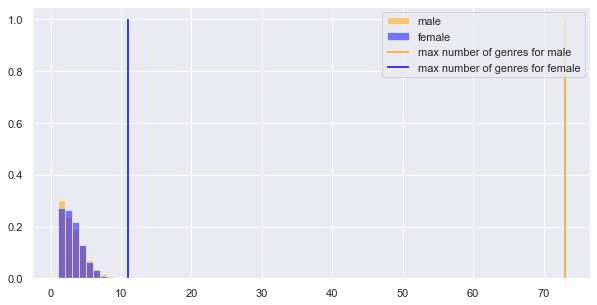

In [32]:
plt.figure(figsize = (10, 5))
plt.hist(data_male.genrelist_length, bins = range(1,max_num), density = True, color = 'orange', alpha = .5, label = 'male')
plt.vlines(x = max_num_male, ymin = 0 , ymax = 1, label = 'max number of genres for male', color = 'orange')
plt.vlines(x = max_num_female, ymin = 0 , ymax = 1, label = 'max number of genres for female', color = 'blue')
plt.hist(data_female.genrelist_length, bins = range(1,max_num), density = True, color = 'blue', alpha = .5,label = 'female')
plt.legend()
plt.show()

Could look at three bins: $[1, mean)$, $[mean,2*mean)$, $[2*mean,25]$

## What are the most common genre labels?

### Count the number of times that a label occurs:

In [33]:
genre_list_1 = data.genrelist.values.tolist()
genre_list_1 = [x for y in genre_list_1 for x in y]
genre_counts = pd.Series(genre_list_1)
label_value_counts = genre_counts.value_counts()

In [39]:
label_value_counts[:20]

pop                 2525
rock                1695
country             1548
r&b                 1517
hip_hop             1075
soul                1033
folk                 948
jazz                 932
alternative_rock     928
blues                840
hard_rock            646
pop_rock             613
indie_rock           501
heavy_metal          485
folk_rock            388
punk_rock            361
gospel               327
funk                 309
dance                295
blues_rock           288
dtype: int64

In [40]:
label_value_counts.shape

(1669,)

Export:

In [41]:
#label_value_counts.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/genre_label_counts_{}.csv'.format(now))

In [42]:
lonely = label_value_counts[label_value_counts <2]
print('There are {} genre labels that only appear for a single artist'.format(lonely.sum()))

There are 810 genre labels that only appear for a single artist


In [45]:
# lonely.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/genre_label_lonely_{}.csv'.format(now))

In [46]:
non_lonely = label_value_counts[label_value_counts >1]
print('There are {} genre labels that appear for at least two artists'.format(non_lonely.shape[0]))

There are 859 genre labels that appear for at least two artists


In [48]:
# non_lonely.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/genre_label_non-lonely_{}.csv'.format(now))

### Which of the lonely labels appear as the only genre label?

First extract the artists with only one genre label:

In [51]:
genre_lonely_artists = data[data.genrelist_length == 1]

In [52]:
genre_lonely_artists.head()

,gender,genrelist,genrelist_length
artist,,,
Claudia_Church,female,[country],1
Peter_Yarrow,male,[folk],1
Manitas_de_Plata,male,[flamenco],1
Meredith_Edwards,female,[country],1
John_Mamann,male,[pop],1


This function marks whether the single genre label of the artist is one that only appears once (and thus for that artist).

In [54]:
def isolated(x):
    if x.genrelist[0] in lonely.index.values:
        x['lonely_isolated'] = 1  
    else: 
        x['lonely_isolated'] = 0
    return x

In [58]:
genre_lonely_artists = genre_lonely_artists.apply(isolated, axis = 1)

In [59]:
genre_lonely_artists.head()

,gender,genrelist,genrelist_length,lonely_isolated
artist,,,,
Claudia_Church,female,[country],1,0
Peter_Yarrow,male,[folk],1,0
Manitas_de_Plata,male,[flamenco],1,0
Meredith_Edwards,female,[country],1,0
John_Mamann,male,[pop],1,0


Select the artists which are both genre_lonely and genre_isolated (within this data set):

In [60]:
genre_lonely_artists[genre_lonely_artists.lonely_isolated == 1]

,gender,genrelist,genrelist_length,lonely_isolated
artist,,,,
Tara_Blaise,female,[pop_folk],1,1
Wing,female,[various],1,1
Sébastien_Agius,male,[popcomédie_musicale],1,1
Haley_Georgia,female,[pop_country],1,1
Paula_Darwish,female,[ethnic_music],1,1
...,...,...,...,...
Dru_Masters,male,[television_score],1,1
Buzz_Cason,male,[male],1,1
MayKay,female,[karate_rock],1,1


We conclude that of the ~800 labels that only appear once, 90% of these appear for artists which have multiple genre labels. 

# Problems! 

Strings to search for to possibly correct:

- 'and'
- '\'
- 'r&g'
- '*'
- '_·_'
- search for all non-letters
- 'descriptors'- '|'
- 'rock_folk_-rock_rock_-electronic_ballad'
- 'hillbilly_rockabilly_r&b'
- '-' at the beggining of a string
- '\xa0' (no break space)

A number of the lonely labels are mistakes:
- 'hardcore\\\\xa0punk'
- 'country_·_americana_·_folk_·_singer_songwriter'
- 'blues_soul_r_&_b_gospel_funk_folk'
- 'college\\\\xa0rock'
- 'gospel_and_gospel_blues'

Clearly some of these need to be parsed into common genres. 

In [122]:
list_length_counts = data.groupby(['genrelist_length']).count()
list_length_counts.drop(['gender'], axis = 1, inplace = True)
list_length_counts.columns = ['artist_count']

In [123]:
list_length_counts

,artist_count
genrelist_length,
1,3626
2,3028
3,2468
4,1590
5,857
6,445
7,187
8,92
9,37


In [201]:
list_length_counts_gender = data.groupby(['genrelist_length','gender']).count()
list_length_counts_gender.columns = ['artist_count']
#list_length_counts_gender['relative']

In [202]:
list_length_counts_gender.head()

artist_count
genrelist_length gender              
1                female          1055
                 male            2571
2                female          1027
                 male            2001
3                female           842

In [203]:
list_length_counts_gender.reset_index(inplace = True)
list_length_counts_gender.set_index(['genrelist_length'], inplace = True)
list_length_counts_gender = list_length_counts_gender.pivot(columns = 'gender')
list_length_counts_gender[('artist_count','female_relative')] = list_length_counts_gender[('artist_count', 'female')]/f
list_length_counts_gender[('artist_count','male_relative')] = list_length_counts_gender[('artist_count', 'male')]/m
#list_length_counts_gender.fillna(-1)
list_length_counts_gender[('artist_count','male_to_female_relative_ratio')] = \
             list_length_counts_gender[('artist_count', 'male_relative')]/ \
             list_length_counts_gender[('artist_count', 'female_relative')]

In [204]:
list_length_counts_gender

artist_count                                        \
gender                 female    male female_relative male_relative   
genrelist_length                                                      
1                      1055.0  2571.0        0.272892      0.302115   
2                      1027.0  2001.0        0.265649      0.235135   
3                       842.0  1626.0        0.217796      0.191069   
4                       504.0  1086.0        0.130367      0.127615   
5                       249.0   608.0        0.064408      0.071445   
6                       123.0   322.0        0.031816      0.037838   
7                        34.0   153.0        0.008795      0.017979   
8                        17.0    75.0        0.004397      0.008813   
9                         6.0    31.0        0.001552      0.003643   
10                        3.0    17.0        0.000776      0.001998   
11                        6.0     7.0        0.001552      0.000823   
12                        NaN     4.0             NaN      0.000470   
13                        NaN     3.0             NaN      0.000353   
14                        NaN     2.0             NaN      0.000235   
15                        NaN     2.0             NaN      0.000235   
45                        NaN     1.0             NaN      0.000118   
73                        NaN     1.0             NaN      0.000118   

                                                
gender           male_to_female_relative_ratio  
genrelist_length                                
1                                     1.107087  
2                                     0.885134  
3                                     0.877285  
4                                     0.978885  
5                                     1.109268  
6                                     1.189277  
7                                     2.044301  
8                                     2.004216  
9                                     2.347160  
10                                    2.574305  
11                                    0.530004  
12                                         NaN  
13                                         NaN  
14                                         NaN  
15                                         NaN  
45                                         NaN  
73                                         NaN

In [150]:
list_length_counts_gender.columns

MultiIndex([('artist_count', 'female'),
            ('artist_count',   'male')],
           names=[None, 'gender'])

### Now let's count the most common genre labels for male and female... TBD

## Promiscuity Plot: Graph of how genres are distributed among genre list sizes

Plan: plot (x = genre, y = n (length of genre list), z = # of artists with genre in their list of n labels ) as heat map

Vectorize. Apply to data DF:

- [x] add column for every genre label
- [x] use apply to make a 1-hot encoding for each artist genre label list
- [x] group by genrelist_length and sum 
- produces: columns = genre labels; rows = genre_list lengths; values = number of artists with those properties

In [65]:
promiscuity = data.copy(deep = True)

In [66]:
promiscuity.head()

,gender,genrelist,genrelist_length
artist,,,
Claudia_Church,female,[country],1
Peter_Yarrow,male,[folk],1
Lorraine_Bowen,female,"[comedy, independent_music]",2
Mike_Pender,male,"[rock, pop]",2
Jennifer_Paige,female,"[pop, pop_rock]",2


Create column for every genre label. (use full set or train set?)

In [67]:
for label in label_value_counts.index:
    promiscuity[label] = 0
    promiscuity[label].astype('int64')

In [68]:
promiscuity.head()

,gender,genrelist,genrelist_length,pop,rock,country,r&b,hip_hop,soul,folk,...,west_coast,new_wave_music,swamp,froggy_fresh,aggressive_soul,bhangramuffin,pop_contemporary_opera,science,bluegrass_gospel,performance_poetry
artist,,,,,,,,,,,,,,,,,,,,,
Claudia_Church,female,[country],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Peter_Yarrow,male,[folk],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lorraine_Bowen,female,"[comedy, independent_music]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mike_Pender,male,"[rock, pop]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jennifer_Paige,female,"[pop, pop_rock]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Define Function for one-hot encoding:

In [69]:
"""One-hot encoding"""
def one_hot_label(x):
    for label in x.genrelist:
        x[label] = 1
    return x

In [70]:
for label in promiscuity.columns[2:]:
    promiscuity[label].astype('int64')

Apply:

In [71]:
promiscuity = promiscuity.apply(one_hot_label, axis = 1)

In [72]:
promiscuity.head()

,gender,genrelist,genrelist_length,pop,rock,country,r&b,hip_hop,soul,folk,...,west_coast,new_wave_music,swamp,froggy_fresh,aggressive_soul,bhangramuffin,pop_contemporary_opera,science,bluegrass_gospel,performance_poetry
artist,,,,,,,,,,,,,,,,,,,,,
Claudia_Church,female,[country],1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Peter_Yarrow,male,[folk],1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Lorraine_Bowen,female,"[comedy, independent_music]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mike_Pender,male,"[rock, pop]",2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jennifer_Paige,female,"[pop, pop_rock]",2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
promiscuity['genrelist_length']

artist
Claudia_Church      1
Peter_Yarrow        1
Lorraine_Bowen      2
Mike_Pender         2
Jennifer_Paige      2
                   ..
Ken_Lewis           7
Eddie_Solis         3
Ernie_K-Doe         1
Robert_Earl_Keen    3
Matt_Minglewood     5
Name: genrelist_length, Length: 12376, dtype: int64

In [74]:
promiscuity_count = promiscuity.groupby(['genrelist_length'], as_index = False).sum() # as_index = False is needed to maintain dtype = int; deals with a pandas bug

In [75]:
promiscuity_count

,genrelist_length,pop,rock,country,r&b,hip_hop,soul,folk,jazz,alternative_rock,...,west_coast,new_wave_music,swamp,froggy_fresh,aggressive_soul,bhangramuffin,pop_contemporary_opera,science,bluegrass_gospel,performance_poetry
0,1,379,187,734,50,438,23,102,173,74,...,0,0,0,0,1,0,0,0,0,0
1,2,664,412,295,338,206,172,218,190,147,...,1,1,0,0,0,0,1,0,0,0
2,3,665,423,189,455,190,290,240,190,176,...,0,0,0,0,0,1,0,1,1,0
3,4,409,288,155,305,113,234,182,151,188,...,0,0,0,0,0,0,0,0,0,0
4,5,212,193,80,189,58,153,101,94,146,...,0,0,1,0,0,0,0,0,0,1
5,6,98,95,40,93,32,78,47,65,111,...,0,0,0,1,0,0,0,0,0,0
6,7,47,40,26,44,20,41,27,27,45,...,0,0,0,0,0,0,0,0,0,0
7,8,25,24,14,21,7,23,15,19,22,...,0,0,0,0,0,0,0,0,0,0
8,9,12,15,5,10,5,9,5,9,10,...,0,0,0,0,0,0,0,0,0,0
9,10,5,6,4,4,3,1,2,7,5,...,0,0,0,0,0,0,0,0,0,0


We record the dtypes: the need to do this may be becaues of a NaN present somewhere

In [76]:
dtypes_before = promiscuity_count.dtypes

Add subtotals for each genre:

In [77]:
promiscuity_count.at['subtotals'] = promiscuity_count.sum()

To maintain ints we reset the dtypes:

In [78]:
promiscuity_count = promiscuity_count.astype(dtypes_before)
promiscuity_count.set_index(['genrelist_length'], inplace = True)

NOTE: subtotals row is now labeled as 238 (dtype = int64).

Let's look at the most frequent genres:

In [79]:
promiscuity_count.iloc[:,:7]

,pop,rock,country,r&b,hip_hop,soul,folk
genrelist_length,,,,,,,
1,379,187,734,50,438,23,102
2,664,412,295,338,206,172,218
3,665,423,189,455,190,290,240
4,409,288,155,305,113,234,182
5,212,193,80,189,58,153,101
6,98,95,40,93,32,78,47
7,47,40,26,44,20,41,27
8,25,24,14,21,7,23,15
9,12,15,5,10,5,9,5


In [80]:
promiscuity_count_100 = promiscuity_count[promiscuity_count.columns[promiscuity_count.loc[238] >100]]

In [81]:
promiscuity_count_100

,pop,rock,country,r&b,hip_hop,soul,folk,jazz,alternative_rock,blues,...,alternative,power_pop,jazz_fusion,pop_punk,alternative_country,indie_folk,synthpop,rhythm_and_blues,electropop,thrash_metal
genrelist_length,,,,,,,,,,,,,,,,,,,,,
1,379,187,734,50,438,23,102,173,74,120,...,10,5,0,2,12,6,1,9,6,8
2,664,412,295,338,206,172,218,190,147,175,...,17,20,15,13,13,17,17,28,15,9
3,665,423,189,455,190,290,240,190,176,176,...,39,22,29,16,32,37,34,20,24,18
4,409,288,155,305,113,234,182,151,188,131,...,21,29,21,28,30,24,23,21,28,29
5,212,193,80,189,58,153,101,94,146,110,...,17,22,14,27,10,14,13,21,20,10
6,98,95,40,93,32,78,47,65,111,56,...,6,13,20,16,11,3,11,6,4,13
7,47,40,26,44,20,41,27,27,45,37,...,2,2,8,6,4,6,5,1,5,6
8,25,24,14,21,7,23,15,19,22,16,...,1,1,3,3,2,3,4,3,0,6
9,12,15,5,10,5,9,5,9,10,9,...,1,0,3,2,0,0,1,1,0,3


In [82]:
# df.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/promiscuity_table.csv')

In [83]:
# df = pd.read_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/promiscuity_table.csv', index_col = 'genre_label')

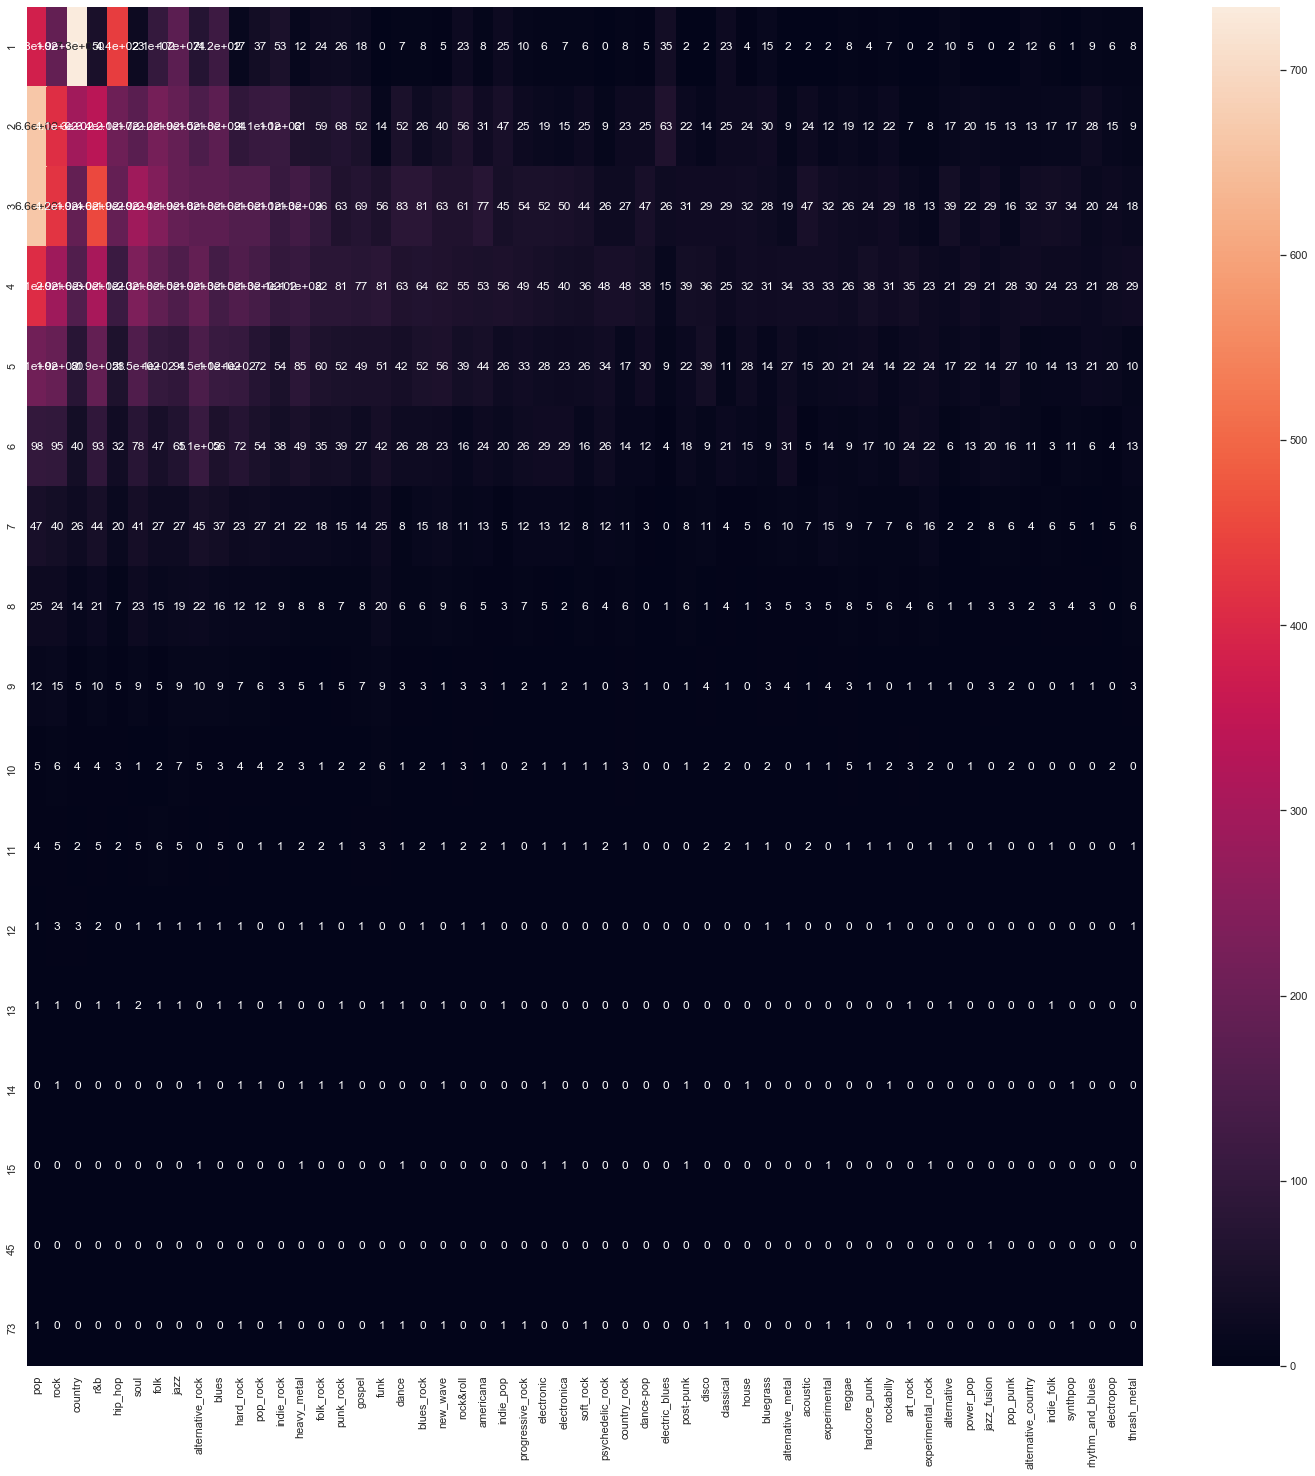

In [84]:
plt.figure(figsize = (25,25))
sns.heatmap(promiscuity_count_100.values[:-1,:], xticklabels = promiscuity_count_100.columns, yticklabels = promiscuity_count_100.index[:-1]   , annot = True, cbar = True)

In [85]:
promiscuity_count_relative = promiscuity_count_100.copy(deep = True)
for genre in promiscuity_count_relative.columns:
    promiscuity_count_relative[genre] = promiscuity_count_relative[genre]/promiscuity_count_100.loc[238,genre]

In [86]:
# promiscuity_count_relative

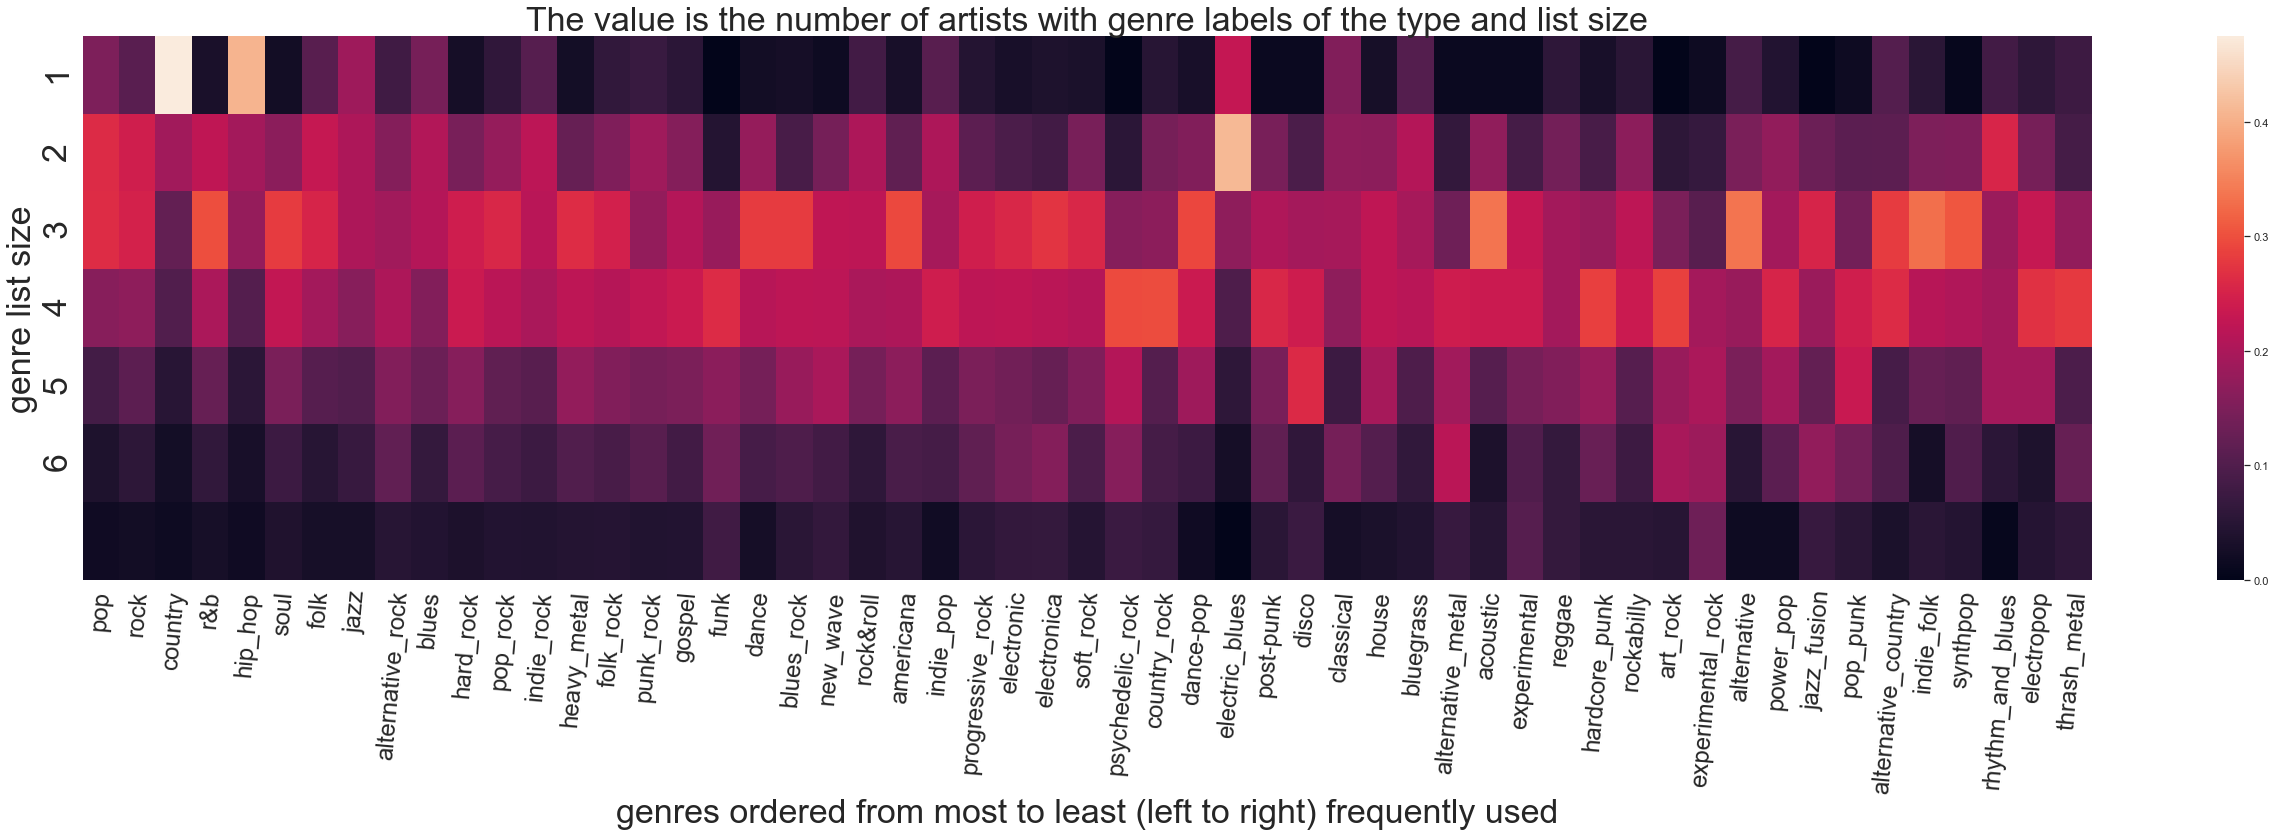

In [92]:
plt.figure(figsize = (45,10))
sns.heatmap(promiscuity_count_relative.values[:7,:], xticklabels = promiscuity_count_relative.columns, yticklabels = promiscuity_count_relative.index[:6]   , annot = False, cbar = True)
plt.ylabel('genre list size', fontsize = 34)
plt.xlabel('genres ordered from most to least (left to right) frequently used', fontsize = 34)
plt.title('The value is the number of artists with genre labels of the type and list size', fontsize = 34)
plt.xticks(rotation = 85, fontsize = 24)
plt.yticks(fontsize = 34)
plt.savefig('/Users/Daniel/Code/Genre/visualizations/promiscuity_relative_plot.png')

### Let's take a look at which genre labels appear when there are at least G genre labels (G to be determined).

In [ ]:
data.head()

In [ ]:
G = 5

In [ ]:
data_many = data[data.num_genres > G]

In [ ]:
data_many.shape

### List of genre labels that appear for artists with more than 5 labels:

In [97]:
# preliminary list of lists
genre_list_G = data_many.genrelist.values.tolist()

In [99]:
genre_list_G[:2]

[['atl hip hop',
  'gangster rap',
  'hip hop',
  'pop rap',
  'rap',
  'southern hip hop',
  'trap'],
 ['east coast hip hop',
  'gangster rap',
  'hip hop',
  'pop rap',
  'queens hip hop',
  'rap']]

In [100]:
# flatten the list of lists to a list
genre_list_G = [x for y in genre_list_G for x in y]

Count the number of times that a label occurs, filter out labels that occur less than 100 times

In [109]:
df = pd.Series(genre_list_G)
df.value_counts()[df.value_counts() > 99]

rap                   177
hip hop               160
folk                  160
folk rock             158
dance pop             156
pop rap               155
mellow gold           148
southern hip hop      144
country rock          130
gangster rap          127
roots rock            126
urban contemporary    122
soft rock             119
trap                  119
classic rock          113
pop                   112
rock                  110
traditional folk      109
adult standards       105
soul                  102
r&b                   101
dtype: int64

The unique values of these promiscuous genres:

In [113]:
genre_list_G_unique = list(set(genre_list_G))
print(f'There are {len(genre_list_G_unique)} unique genre labels used for artists with at least 6 labels')

There are 787 unique genre labels used for artists with at least 6 labels


Look at those labels which are used for artists with $N$ or more labels and not for artists with $<N$ labels.

We also want to look at these in terms of gender...

In [3]:
df = pd.read_csv('../../data/women_in_rock.csv')
df

,artist,genre
0,Big Mama Thornton,"acoustic blues, blues, electric blues, harmoni..."
1,LaVern Baker,"brill building pop, doo-wop, jump blues, rhyth..."
2,Ruth Brown,"jazz blues, jump blues, rhythm and blues, rock..."
3,Etta James,"adult standards, jazz blues, soul, soul blues,..."
4,Janis Martin,"rhythm and blues, rock-and-roll, rockabilly"
...,...,...
121,the Donnas,"candy pop, garage rock, glam punk, power-pop punk"
122,Dolores O'Riordan,"limerick indie, pop rock"
123,Mystic,"dark trap, emo rap, underground hip hop"
124,Pink,"album rock, art rock, classic rock, progressiv..."


Take a look at a new version of the Kaggle data:

In [17]:
df = pd.read_csv('../../data/kaggle_genres_rough.csv',  encoding = 'latin-1')

In [18]:
df.shape

(23177, 6)

In [19]:
df.head()

,Unnamed: 0,artist,gender,category,retrieved,genre
0,0,12 Gauge,male,African-American_male_rappers,12 Gauge,['miami bass']
1,1,1987,male,Swedish_male_singers,Cartridge 1987,['retro electro']
2,2,2 Chainz,male,African-American_male_rappers,2 Chainz,"['atl hip hop', 'gangster rap', 'hip hop', 'po..."
3,3,2 Pistols,male,African-American_male_rappers,2 Pistols,"['dirty south rap', 'pop rap', 'southern hip h..."
4,4,21 Savage,male,African-American_male_rappers,21 Savage,"['atl hip hop', 'rap', 'trap']"


In [20]:
n = np.random.randint(df.shape[0])
df.retrieved.iloc[n]

'Henry Whitter'

In [25]:
df_with_genre = df[df.retrieved != 'none']

In [26]:
df_with_genre.head()

,Unnamed: 0,artist,gender,category,retrieved,genre
0,0,12 Gauge,male,African-American_male_rappers,12 Gauge,['miami bass']
1,1,1987,male,Swedish_male_singers,Cartridge 1987,['retro electro']
2,2,2 Chainz,male,African-American_male_rappers,2 Chainz,"['atl hip hop', 'gangster rap', 'hip hop', 'po..."
3,3,2 Pistols,male,African-American_male_rappers,2 Pistols,"['dirty south rap', 'pop rap', 'southern hip h..."
4,4,21 Savage,male,African-American_male_rappers,21 Savage,"['atl hip hop', 'rap', 'trap']"


In [34]:
df_with_genre[df_with_genre.retrieved == 'none']

,Unnamed: 0,artist,gender,category,retrieved,genre


In [35]:
df_with_genre.shape

(19632, 6)

In [36]:
equal = (df_with_genre.retrieved == df_with_genre.artist)

In [37]:
equal.shape

(19632,)

In [38]:
equal.sum()

16205

In [39]:
df_equal = df_with_genre[equal]
df_equal.artist.unique().shape

(16205,)

In [40]:
df_equal.genre.unique()

array(["['miami bass']",
       "['atl hip hop', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']",
       "['dirty south rap', 'pop rap', 'southern hip hop', 'trap']", ...,
       "['chanson', 'french indie pop', 'french indietronica', 'french pop', 'french rock', 'nouvelle chanson francaise']",
       "['cuban rumba', 'trova']",
       "['classic norwegian pop', 'danseband', 'norwegian rock']"],
      dtype=object)

In [43]:
df_equal.genre.isnull().sum()

0